In [1]:
#!jupyter nbconvert --to=python MZ_F2R_sensitivity_runs_python3.ipynb

In [3]:
import pyfesom2 as pf
import numpy as np
import matplotlib.pylab as plt
import matplotlib.cm as cm
from netCDF4 import Dataset

#import sys
#sys.path.append('/home/ollie/mseifert/py_fesom/modules/')
#sys.path.append('/home/ollie/mozeisin/pyfesom2/pyfesom2')
#sys.path.append('/home/ollie/mozeisin/py_recom/GlobalAssessment')

In [4]:
#from mpl_toolkits.basemap import Basemap
#import cartopy
import cartopy.crs as ccrs
import pangaeapy.pandataset as pd


import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
from pylab import *
#from load_mesh_data import *
import numpy as np
#from PiecewiseNorm import PiecewiseNorm
from netCDF4 import Dataset
import colormaps as cmaps
from matplotlib.colors import ListedColormap
import math                                   # NEW (according to Caras example of area weighting of a 1x1 grid)

viridis = ListedColormap(cmaps.viridis.colors)

In [5]:
meshpath = '/work/ollie/mozeisin/mesh/mesh_fesom2.0/core2_meanz'

mesh = pf.load_mesh(meshpath, abg=[50, 15, -90], usepickle=True)

resultpath = '/work/ollie/mozeisin/results/f2r1.2/'
savepath = '/work/ollie/mozeisin/evaluation/mo_files'


/work/ollie/mozeisin/mesh/mesh_fesom2.0/core2_meanz/pickle_mesh_py3_fesom2
The usepickle == True)
The pickle file for FESOM2 exists.
The mesh will be loaded from /work/ollie/mozeisin/mesh/mesh_fesom2.0/core2_meanz/pickle_mesh_py3_fesom2


In [13]:
print(mesh.zlev)
mesh.nlev

[ 0.00e+00 -5.00e+00 -1.00e+01 -2.00e+01 -3.00e+01 -4.00e+01 -5.00e+01
 -6.00e+01 -7.00e+01 -8.00e+01 -9.00e+01 -1.00e+02 -1.15e+02 -1.35e+02
 -1.60e+02 -1.90e+02 -2.30e+02 -2.80e+02 -3.40e+02 -4.10e+02 -4.90e+02
 -5.80e+02 -6.80e+02 -7.90e+02 -9.10e+02 -1.04e+03 -1.18e+03 -1.33e+03
 -1.50e+03 -1.70e+03 -1.92e+03 -2.15e+03 -2.40e+03 -2.65e+03 -2.90e+03
 -3.15e+03 -3.40e+03 -3.65e+03 -3.90e+03 -4.15e+03 -4.40e+03 -4.65e+03
 -4.90e+03 -5.15e+03 -5.40e+03 -5.65e+03 -6.00e+03 -6.25e+03]


48

In [24]:
mesh.elem[mesh.no_cyclic_elem,:]

array([[  1763,  96635, 125225],
       [  1477, 112277,    703],
       [ 78543,  78544,   5048],
       ...,
       [ 94520, 126857,  94519],
       [ 94520, 126857,  94514],
       [126856,  19370,  94513]])

In [28]:
mesh.n2d, len(mesh.x2)

(126858, 126858)

## Data

In [6]:
#pf.get_data?

In [7]:
years = range(1948,1951)
runid = 'mo1'

datapath = resultpath + runid

#var = 'temp'
var = 'DiaChl'

In [8]:
%%bash 
ncdump -h /work/ollie/mozeisin/results/f2r1.2/mo1/DiaChl.mo1.1950.nc 

netcdf DiaChl.mo1.1950 {
dimensions:
	nz1 = 47 ;
	nod2 = 126858 ;
	time = UNLIMITED ; // (12 currently)
variables:
	double time(time) ;
		time:long_name = "time" ;
		time:units = "seconds since 1950-01-01 0:0:0" ;
	float DiaChl(time, nod2, nz1) ;
		DiaChl:description = "DiaChl" ;
		DiaChl:units = "[mmol/m3]" ;
}


In [9]:
data = pf.get_data(datapath,
                   var, 
                   years,
                   mesh,
                   runid=runid,
                   how='ori',
                   compute=False) #,chunks={'nod2':10000, 'nz1':5})

Depth is None, 3d field will be returned


In [10]:
data.shape

(36, 126858, 47)

In [11]:
data_mean = data.mean(dim='time').compute()
data_mean.shape
              

(126858, 47)

## Plotting

[<GeoAxesSubplot:>]

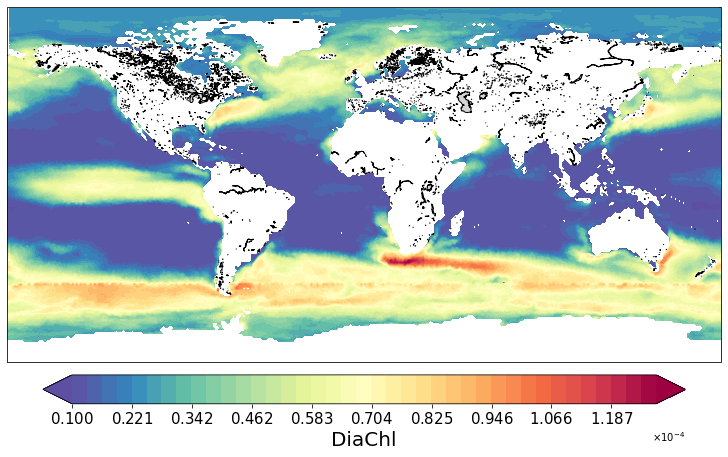

In [12]:
pf.plot(mesh, data_mean[:,0].values, units=var)

[<GeoAxesSubplot:>]

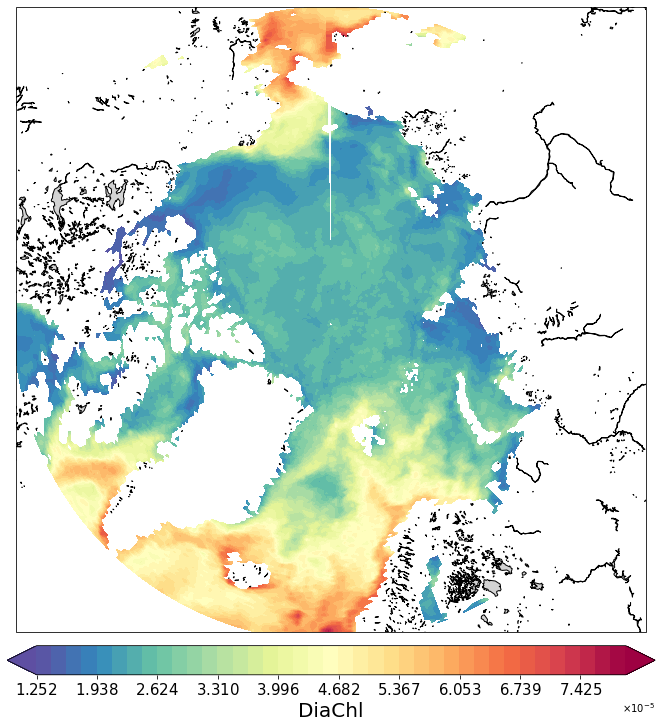

In [13]:
pf.plot(mesh, data_mean[:,0].values, mapproj='np', box=[-180, 180, 60, 90], units=var)

#### Regional mask

In [14]:
#np.ma.masked_array?

In [15]:
#pf.get_mask?

In [16]:
mask_al = np.invert(pf.get_mask(mesh, "Atlantic_Basin"))
#mask_al.shape

[<GeoAxesSubplot:>]

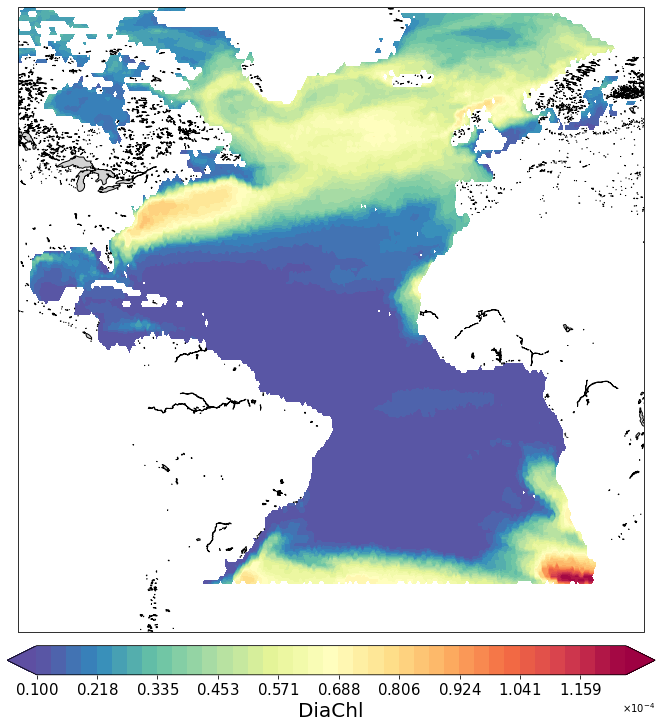

In [17]:
pf.plot(mesh, 
        np.ma.masked_array(data_mean[:,0].values, mask=mask_al), 
        units=var,
        box = [-100,30,-50,80])

In [18]:
mesh.n2d

126858

## Differences

In [19]:
years = range(1949,1951)
var = 'DiaChl'

runid = 'mo1'
data_mean_mo1 = pf.get_data(resultpath + runid,
                   var, 
                   years,
                   mesh,
                   runid=runid,
                   how='mean',
                   compute=True) 

runid = 'mo2'
data_mean_mo2 = pf.get_data(resultpath + runid,
                   var, 
                   years,
                   mesh,
                   runid=runid,
                   how='mean',
                   compute=True)

runid = 'mo3'
data_mean_mo3 = pf.get_data(resultpath + runid,
                   var, 
                   years,
                   mesh,
                   runid=runid,
                   how='mean',
                   compute=True)

Depth is None, 3d field will be returned
Depth is None, 3d field will be returned
Depth is None, 3d field will be returned


In [20]:
#pf.plot?

array([<GeoAxesSubplot:title={'center':'mo1'}>,
       <GeoAxesSubplot:title={'center':'mo2'}>,
       <GeoAxesSubplot:title={'center':'mo3'}>], dtype=object)

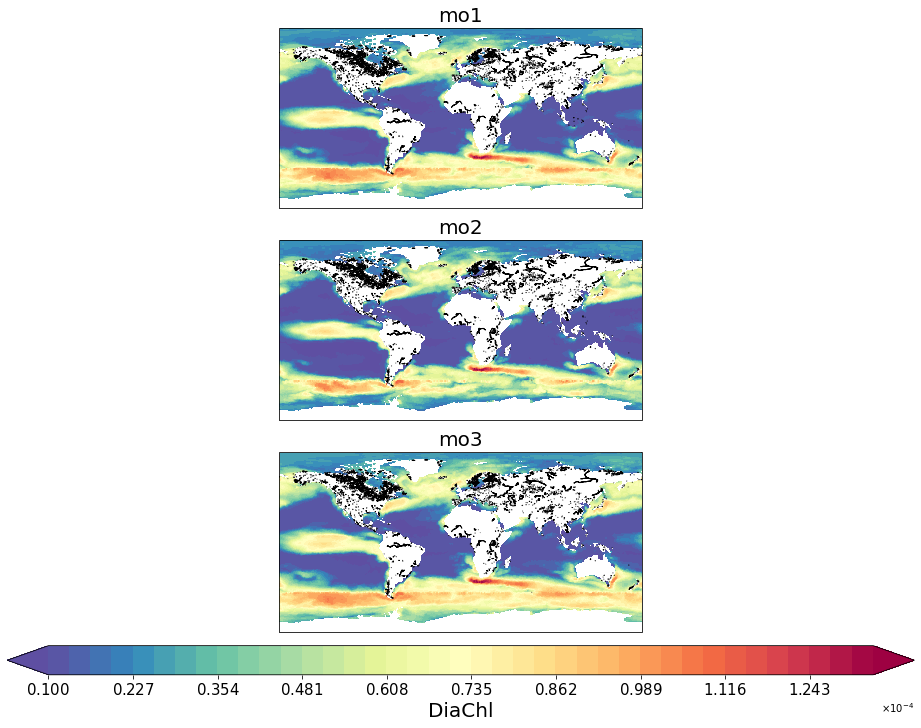

In [21]:
pf.plot(mesh, 
        [data_mean_mo1[:,0], data_mean_mo2[:,0], data_mean_mo3[:,0]], 
        units = var,
       rowscol=[3,1],
        titles=['mo1', 'mo2', 'mo3'],
       figsize=(14,10))


#### Differences

array([<GeoAxesSubplot:title={'center':'Differences DiaChl $\\longrightarrow$ P$_{cm,d}$ = 2.5'}>,
       <GeoAxesSubplot:title={'center':'Differences DiaChl $\\longrightarrow$ P$_{cm,d}$ = 4.5'}>],
      dtype=object)

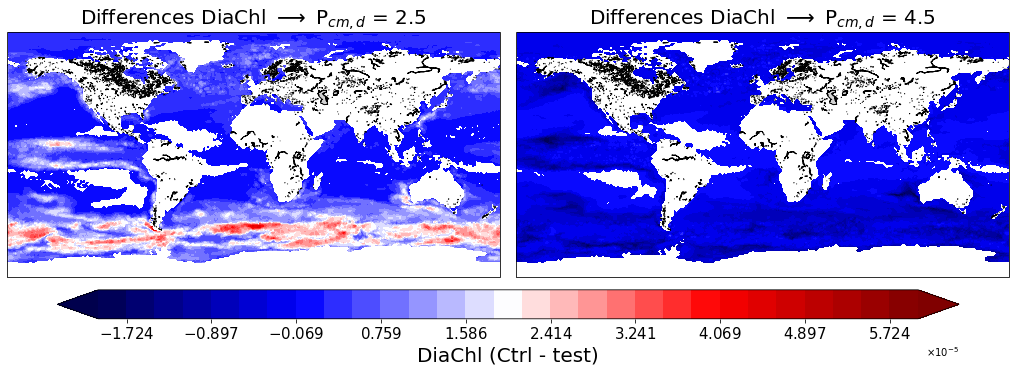

In [22]:
pf.plot(mesh, 
        [data_mean_mo1[:,0]- data_mean_mo2[:,0], data_mean_mo1[:,0]- data_mean_mo3[:,0]],
        units = var + ' (Ctrl - test)',
        cmap=cm.seismic,
        levels = (-2e-5, 6e-5,30),
        titles = ['Differences ' + var + ' $\longrightarrow$ P$_{cm,d}$ = 2.5',
                 'Differences ' + var + ' $\longrightarrow$ P$_{cm,d}$ = 4.5'],
        rowscol = [1,2],
       figsize=(14,10))

[<GeoAxesSubplot:title={'center':'Differences DiaChl $\\longrightarrow$ P$_{cm,d}$ = 2.5'}>]

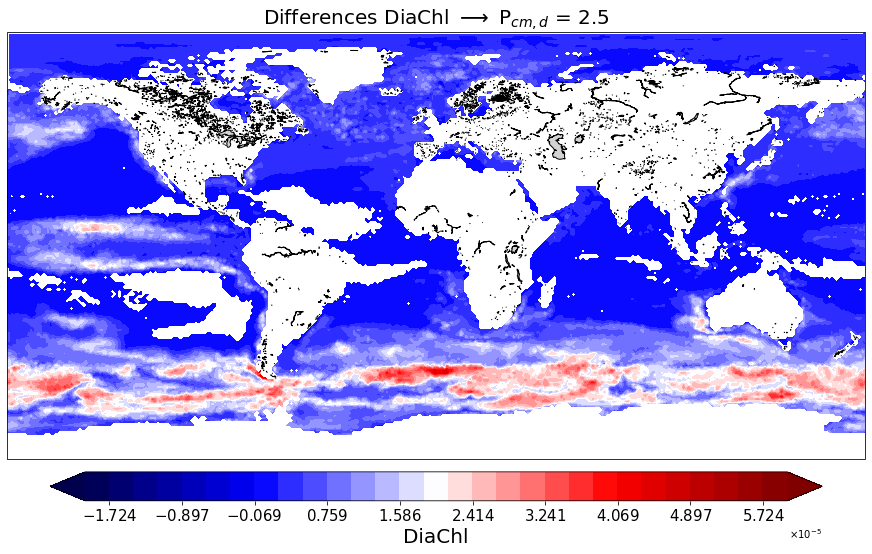

In [23]:
pf.plot(mesh, 
        [data_mean_mo1[:,0]- data_mean_mo2[:,0]],
        units = var,
        cmap=cm.seismic,
        levels = (-2e-5, 6e-5,30),
        titles = 'Differences ' + var + ' $\longrightarrow$ P$_{cm,d}$ = 2.5',
       figsize=(12,10))

[<GeoAxesSubplot:title={'center':'Differences DiaChl $\\longrightarrow$ P$_{cm,d}$ = 4.5'}>]

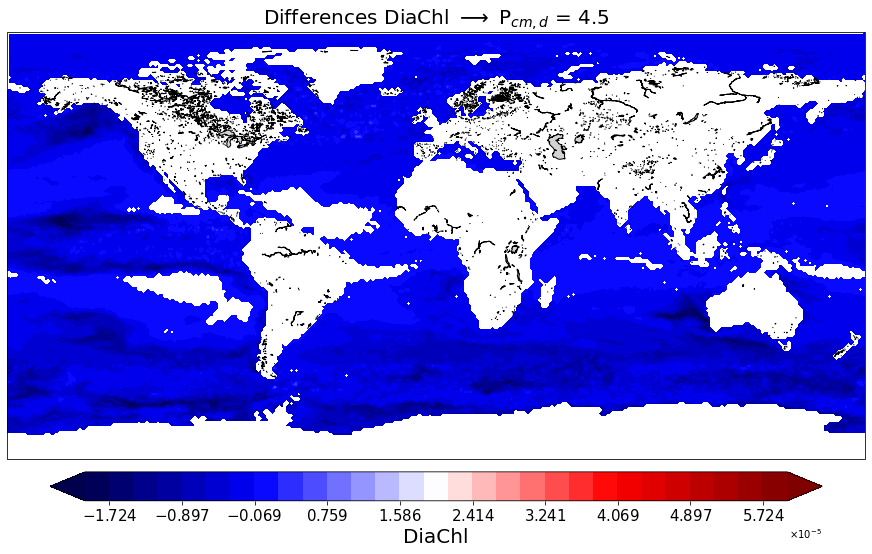

In [24]:
pf.plot(mesh, 
        [data_mean_mo1[:,0]- data_mean_mo3[:,0]],
        units = var,
        cmap=cm.seismic,
        levels = (-2e-5, 6e-5,30),
        titles = 'Differences ' + var + ' $\longrightarrow$ P$_{cm,d}$ = 4.5',
       figsize=(12,10))

## Transect

#### Atlantic :  Diatom Chl

<GeoAxesSubplot:>

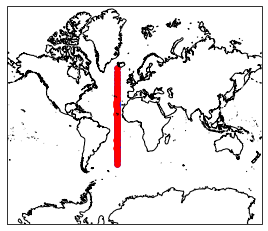

In [25]:
lon_start = -25
lat_start = -50
lon_end = -25
lat_end = 65
npoints   = 50
lonlat = pf.transect_get_lonlat(lon_start, lat_start, lon_end, lat_end, npoints)

pf.plot_transect_map(lonlat, mesh)

Atlantic Transect, mean 1949-1950


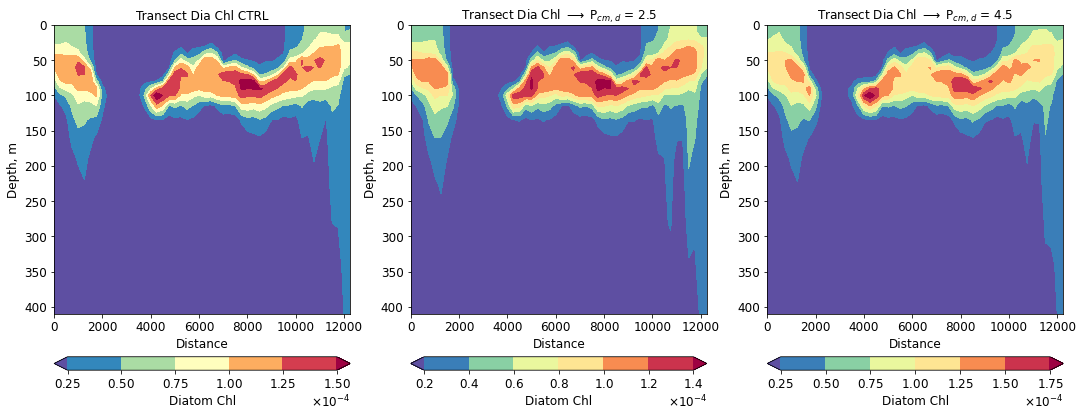

In [26]:
dist, transect_data = pf.get_transect(data_mean_mo1,mesh,lonlat)
dist2, transect_data2 = pf.get_transect(data_mean_mo2,mesh,lonlat)
dist3, transect_data3 = pf.get_transect(data_mean_mo3,mesh,lonlat)

pf.plot_xyz(mesh, 
            [transect_data,transect_data2,transect_data3],
            dist,
            maxdepth=500,
            ncols=3,
            xlabel='Distance',
            label='Diatom Chl',
            title=['Transect Dia Chl CTRL', 'Transect Dia Chl $\longrightarrow$ P$_{cm,d}$ = 2.5',
                 'Transect Dia Chl $\longrightarrow$ P$_{cm,d}$ = 4.5'],
            #levels=np.linspace(-2,2, 41),cmap=cm.hot_r,
            figsize=(15, 6))
print('Atlantic Transect, mean 1949-1950')

In [27]:
#pf.plot_xyz?

#### Fram Strait: Temperature

In [28]:
year = 1950

In [29]:
temp = pf.get_data(resultpath + runid, 'temp', year, mesh, runid=runid)

Depth is None, 3d field will be returned


In [30]:
lon_start = -5
lat_start = 85
lon_end = -5
lat_end = 75
npoints   = 50
lonlat = pf.transect_get_lonlat(lon_start, lat_start, lon_end, lat_end, npoints)

<GeoAxesSubplot:>

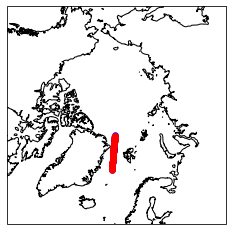

In [31]:
pf.plot_transect_map(lonlat, mesh, view='np')

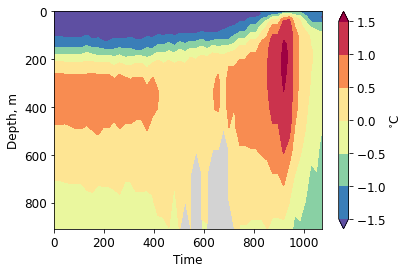

In [32]:
dist, temp_transect_data = pf.get_transect(temp,
    mesh,
    lonlat)
pf.plot_xyz(mesh, temp_transect_data, dist)

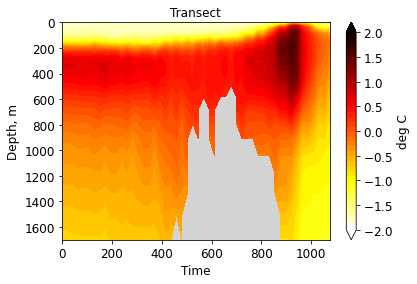

In [33]:
pf.plot_xyz(mesh, 
            temp_transect_data,
            dist,
            maxdepth=2000,
            label="deg C",
            title="Transect",
            levels=np.linspace(-2,2, 41),
            cmap=cm.hot_r
           )

## Plotting NPPd

In [34]:
%%bash
ncdump -h /work/ollie/mozeisin/results/f2r1.2/mo1/NPPd.mo1.1950.nc 

netcdf NPPd.mo1.1950 {
dimensions:
	nod2 = 126858 ;
	time = UNLIMITED ; // (12 currently)
variables:
	double time(time) ;
		time:long_name = "time" ;
		time:units = "seconds since 1950-01-01 0:0:0" ;
	float NPPd(time, nod2) ;
		NPPd:description = "Mean NPP diatoms" ;
		NPPd:units = "mmolC/(m3*d)" ;
}


In [37]:
var = 'NPPd'
years = range(1949,1951)
runid = 'mo1'

data_NPPd = pf.get_data(datapath,
                   var, 
                   years,
                   mesh,
                   runid=runid,
                   how='mean',
                   compute=True)
                
#data_NPPd_mean = data_NPPd.mean(dim='time').compute()  
np.shape(data_NPPd)

Depth is None, 3d field will be returned


(126858,)

[<GeoAxesSubplot:>]

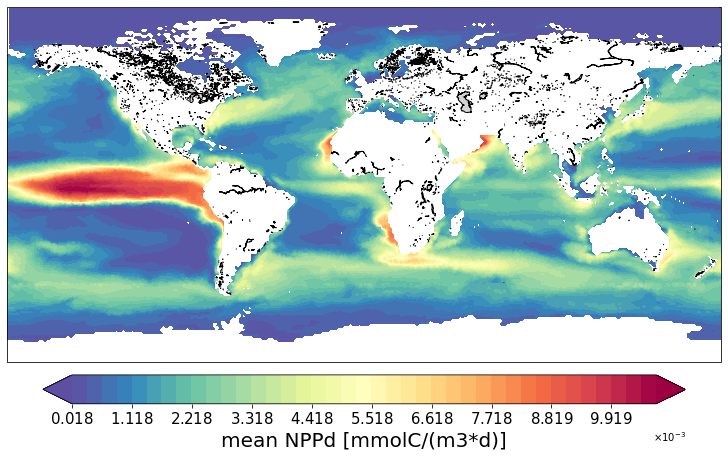

In [38]:
pf.plot(mesh, data_NPPd, 
        #mapproj='np', 
        #box=[-180, 180, 60, 90], 
        units='mean NPPd [mmolC/(m3*d)]')

#### Differences

Depth is None, 3d field will be returned
Depth is None, 3d field will be returned
Depth is None, 3d field will be returned


array([<GeoAxesSubplot:title={'center':'mo1 $\\longrightarrow$ P$_{cm,d}$ = 3.5'}>,
       <GeoAxesSubplot:title={'center':'mo1'}>,
       <GeoAxesSubplot:title={'center':'mo2 $\\longrightarrow$ P$_{cm,d}$ = 2.5'}>,
       <GeoAxesSubplot:title={'center':'mo1-mo2'}>,
       <GeoAxesSubplot:title={'center':'mo3 $\\longrightarrow$ P$_{cm,d}$ = 4.5'}>,
       <GeoAxesSubplot:title={'center':'mo1-mo3'}>], dtype=object)

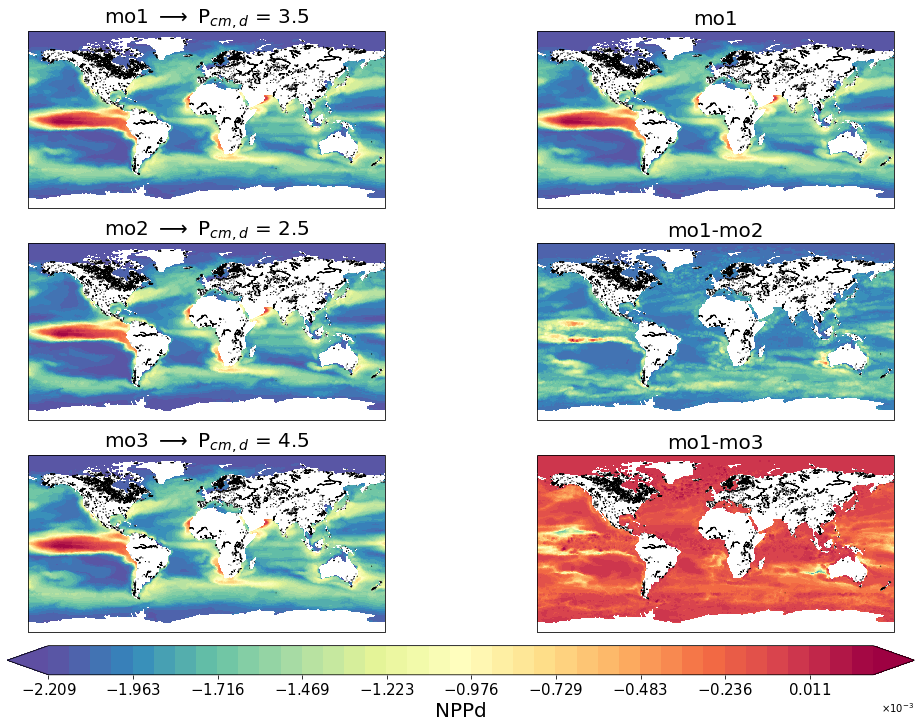

In [43]:
runid = 'mo1'
data_mean_mo1 = pf.get_data(resultpath + runid,
                   var, 
                   years,
                   mesh,
                   runid=runid,
                   how='mean',
                   compute=True) 

runid = 'mo2'
data_mean_mo2 = pf.get_data(resultpath + runid,
                   var, 
                   years,
                   mesh,
                   runid=runid,
                   how='mean',
                   compute=True)

runid = 'mo3'
data_mean_mo3 = pf.get_data(resultpath + runid,
                   var, 
                   years,
                   mesh,
                   runid=runid,
                   how='mean',
                   compute=True)

pf.plot(mesh, 
        [data_mean_mo1, data_mean_mo1,
         data_mean_mo2, data_mean_mo1 - data_mean_mo2,
         data_mean_mo3, data_mean_mo1 - data_mean_mo3], 
        units = var,
       rowscol=[3,2],
        titles=['mo1 $\longrightarrow$ P$_{cm,d}$ = 3.5', 'mo1', 
                'mo2 $\longrightarrow$ P$_{cm,d}$ = 2.5', 'mo1-mo2', 
                'mo3 $\longrightarrow$ P$_{cm,d}$ = 4.5', 'mo1-mo3'],
       figsize=(14,10))

## Evaluation

#### MareDat from Miriam

In [ ]:
data_file1 = 'MarEDat20120716Diatoms.nc' 
datamacro  = '/work/ollie/mseifert/'+data_file1
ncfile     = datamacro

In [ ]:
%%bash
ncdump -h /work/ollie/mseifert/MarEDat20120716Diatoms.nc
# BIOMASS:units = "ug/L"

In [ ]:
f          = Dataset(ncfile, 'r')
biomass_macro  = f['BIOMASS'][:]
lon_macro      = f['LONGITUDE'][:]
lat_macro      = f['LATITUDE'][:]
depth_macro    = f['DEPTH'][:]

biomass_macro[:][biomass_macro[:] == 1e+35] = np.nan
biomass_macro_an = np.nanmean(biomass_macro[:],axis=0)
biomass_macro_an_int = np.nansum(biomass_macro_an[:],axis=0)

dep_ind   = np.nonzero((0 <= depth_macro[:] )&(depth_macro[:] <= 5))
dep_ind2  = np.nonzero((5 < depth_macro[:] )&(depth_macro[:] <= 25))
dep_ind3  = np.nonzero((25 < depth_macro[:] )&(depth_macro[:] <= 100))
dep_ind4  = np.nonzero((100 < depth_macro[:]))

macro_so        = biomass_macro_an
macro_so_050    = np.squeeze(np.nansum(macro_so[dep_ind],axis=0))         #squeeze: To get rid of the depth dimension (180, 360 instead of 1, 180, 360)                                                         
macro_so_50150  = np.squeeze(np.nansum(macro_so[dep_ind2],axis=0))
macro_so_150350 = np.squeeze(np.nansum(macro_so[dep_ind3],axis=0))
macro_so_350    = np.squeeze(np.nansum(macro_so[dep_ind4],axis=0))

In [ ]:
np.shape(macro_so_050)


In [ ]:
plt.pcolor(macro_so_050)
plt.colorbar()

#### Comparision with Bracher et al. (2019) PS106

In [131]:
# import from PANGAEA
ds= pd.PanDataSet(899284)
print(ds.title)
PS106.head()
# Chl a in µg/L

PS106 = ds.data

#print(np.shape(PS106), type(PS106))

Phytoplankton pigment concentration and phytoplankton groups measured on water samples obtained during POLARSTERN cruise PS106 in the Arctic Ocean


,Event,Sample ID,Campaign,Station,Gear,Depth water,Date/Time,Latitude,Longitude,Chlide a,...,DV chl a,Chl a,Phytin a,Chl a Haptophyta,Chl a diatoms,Chl a Dinofl,Chl a Cyanob,Chl a Chloro,Chl a Crypto,Chl a Chryso
0,PS106_ZODIAK_170527,Bulk 1,PS106.1,PS106.1_Zodiac,Zodiac,0.0,2017-05-27 09:00:00,64.68650,2.7425,0.0,...,0.012865,2.808448,0.0,0.322226,1.548986,0.227579,0.095494,0.303740,0.296683,0.026605
1,PS106_ZODIAK_170529,Bulk 2,PS106.1,PS106.1_Zodiac,Zodiac,0.0,2017-05-29 08:30:00,72.41200,5.5948,0.0,...,0.000000,2.221540,0.0,0.561083,0.870574,0.335601,0.012340,0.234620,0.058027,0.149295
2,PS106_ZODIAK_170529,Bulk 2,PS106.1,PS106.1_Zodiac,Zodiac,0.0,2017-05-29 08:30:00,72.41200,5.5948,0.0,...,0.000000,2.335853,0.0,0.602580,0.952693,0.352464,0.017828,0.218102,0.082647,0.109539
3,PS106_ZODIAK_170531,Bulk 3,PS106.1,PS106.1_Zodiac,Zodiac,0.0,2017-05-31 08:20:00,79.31933,8.4100,0.0,...,0.000000,0.384615,0.0,0.099194,0.068056,0.027449,0.002078,0.147426,0.021176,0.019236
4,PS106_ZODIAK_170601,Bulk 4,PS106.1,PS106.1_Zodiac,Zodiac,0.0,2017-06-01 10:30:00,80.42583,7.2647,0.0,...,0.000000,0.932325,0.0,0.102667,0.322383,0.100330,0.000000,0.316074,0.053597,0.037274


fig_PS106 = PS106.plot(kind='scatter', 
           x='Longitude', y='Latitude',
          c='Chl a diatoms', cmap=plt.get_cmap("jet"), colorbar=True,
          figsize = (10,7))

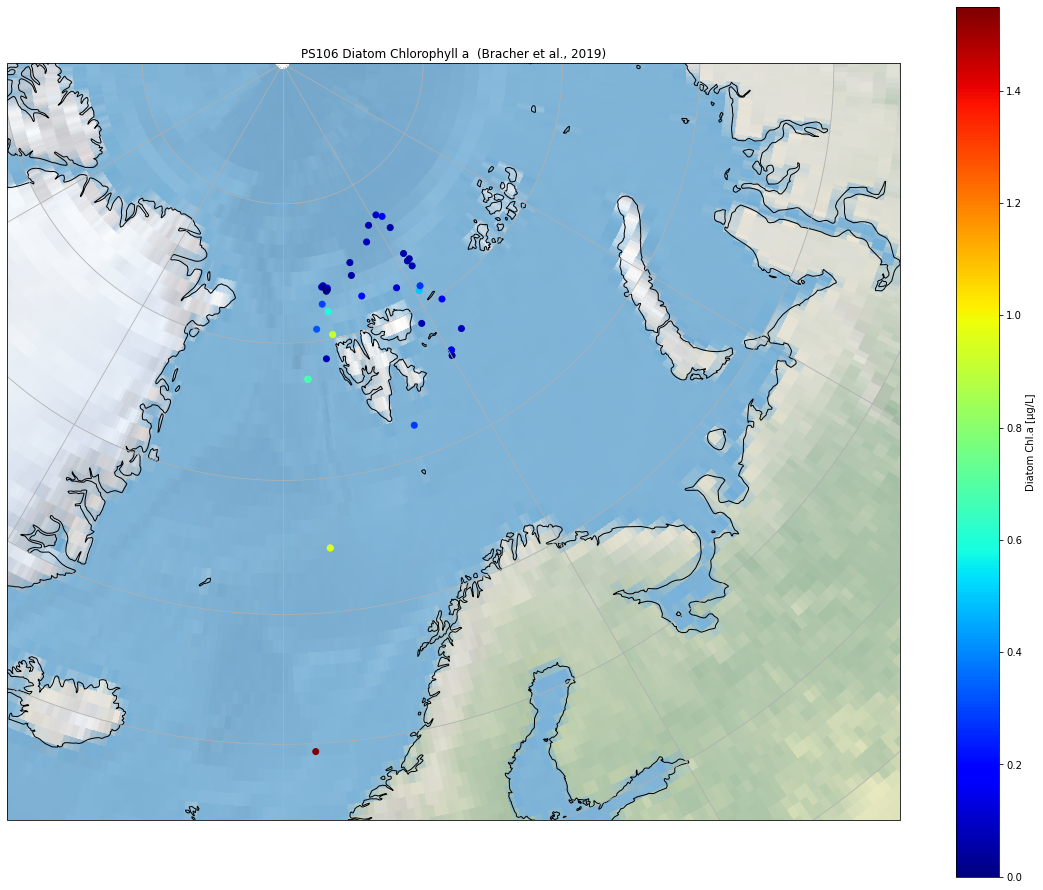

In [124]:
# plot with cartopy

# defining projections
og = ccrs.Orthographic(0,90)
pc = ccrs.PlateCarree()

PS106_Chla_dia = PS106['Chl a diatoms']
lat, lon = PS106['Latitude'], PS106['Longitude']

fig = plt.figure(figsize=(20, 16))
ax = plt.axes(projection=og)
ax.coastlines()
ax.gridlines()
plt.scatter(lon, lat, transform = pc, 
    c=PS106_Chla_dia, cmap=plt.get_cmap("jet"))
ax.set_extent([-20, 50, 60, 90])
ax.stock_img()
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('PS106 Diatom Chlorophyll a  (Bracher et al., 2019)')
plt.colorbar(label='Diatom Chl.a [µg/L]')
#plt.clim(0, 10)

## Evaluation Scripts from py_recom

In [ ]:
import sys
sys.path.append('/home/ollie/mozeisin/SkillMetrics')
sys.path.append('/home/ollie/mozeisin/pyfesom2/pyfesom2')

modulepath = '/home/ollie/mozeisin/py_recom/GlobalAssessment'
sys.path.append(modulepath)

meshpath = '/work/ollie/mozeisin/mesh/mesh_fesom2.0/core2_meanz'

resultpath = '/work/ollie/mozeisin/results/f2r1.2/'
savepath = '/work/ollie/mozeisin/evaluation/mo_files'

layerwise    = False

runname = 'mo1'
datapath = resultpath + runname + '/'

htmlname     =  runname+'.html'
htmlpath     = '/work/ollie/mozeisin/evaluation/Jupyter_html/'

# period of analysis ------------------------------------------------------------------------------------

first_year = 1948
last_year  = 1950

#first_year_ts = 1958
#last_year_ts  = 1984

# mesh and initialization file specifications -----------------------------------------------------------

mesh_id                  = 'CORE2'
ncfileAlk                = '/work/ollie/projects/MarESys/evaluation/GLODAPv2.2016b.TAlk.nc'
ncfileDIC                = '/work/ollie/projects/MarESys/evaluation/GLODAPv2.2016b.TCO2.nc'
ncfileDSi                = '/work/ollie/projects/MarESys/evaluation/woa13_all_i00_01.nc'
ncfileDIN                = '/work/ollie/projects/MarESys/evaluation/woa13_all_n00_01.nc'
ncfileDO2                = '/work/ollie/projects/MarESys/evaluation/woa18_all_o00_01.nc'
ncfileDFe                = '/work/ollie/projects/MarESys/evaluation/fe_pisces_opa_eq_init_3D.nc' 
ncfileNPPTotalGlobal     = '/work/ollie/projects/MarESys/evaluation/'+'fesom.initial.mesh.diag.nc'
ncfileCO2fluxTotalGlobal = '/work/ollie/projects/MarESys/evaluation/'+'fesom.initial.mesh.diag.nc'
ncfileTemp               = '/work/ollie/projects/MarESys/evaluation/woa18_decav_t00_01.nc'
ncfileSal                = '/work/ollie/projects/MarESys/evaluation/woa18_decav_s00_01.nc'
ncfilepCO2               = '/work/ollie/projects/MarESys/evaluation/SOCATv6_tracks_gridded_monthly.nc'
ncfileMLD                = '/work/ollie/projects/MarESys/evaluation/mld_DR003.nc'
matfileChlsurf           = '/work/ollie/projects/MarESys/evaluation/climatology_annual_chl_1deg_OCCCI_2012_2015.mat'
txtfileCO2flux           = '/work/ollie/projects/MarESys/evaluation/CO2_flux2015_Takahashietal2009_original.txt'


#### Diatoms

In [ ]:
import DiaC_python3 as DiaC

In [ ]:
DiaC_global = DiaC.DiaC_global(runname,datapath,savepath,meshpath,first_year,last_year)

In [ ]:
DiaC_global.plot()

#### Mixed layer Depth

In [ ]:
!jupyter nbconvert --to=python MLDspatial.ipynb
from MLDspatial import MLDspatial_global
Test = MLDspatial_global(runname,resultpath,savepath,meshpath,modulepath,first_year,last_year,method='mlotst')
# possible methods are: 
# 'omldamax' : daily maximum ocean mixed layer thickness [m] defined by mixing scheme
# 'mlotst'   : mixed layer depth [m], computed with Levitus method (with 0.125 kg/m3 criterion)       
Test.plot()

#### Nutrients

In [ ]:
!jupyter nbconvert --to=python DIN_WOA_Comparison_python3.ipynb
from DIN_WOA_Comparison_python3 import DIN_WOA_global
Test = DIN_WOA_global(runname,resultpath,savepath,meshpath,first_year,last_year,mesh_id,ncfileDIN,layerwise)
Test.plot()

## Evaluation scripts from pyfesom 2

#### Diatom Chla integrals

In [ ]:
DiaChl = pf.get_data(datapath, 'DiaChl', years, mesh, runid=runid, how=None, compute=False)

In [ ]:
#pf.volmean_data?
DiaChl_volmean = pf.volmean_data(DiaChl, mesh, meshdiag=datapath + "mo1  .mesh.diag.nc", runid = runid)

In [ ]:
DiaChl_volmean.plot()

#### Sea Ice integrals

In [ ]:
a_ice = pf.get_data(datapath, 'a_ice', range(1948,1951), mesh, runid='mo1', how=None, compute=False)

ice_area = pf.ice_area(a_ice, mesh,)
ice_ext = pf.ice_ext(a_ice, mesh)

ice_area.plot()